# Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#cargamos el dataframe
df = pd.read_csv('preu lloguer per trimestre i barri.csv')

# le pedimos que nos imprima la cabecera para ver las columnas que tiene
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


### Analizamos el conjunto de datos.

In [6]:
# Número de filas y el número de columnas 
df.shape

(584, 8)

In [7]:
# El total de número de filas y el número de columnas 
df.size

4672

In [8]:
# Qué columnas tiene el dataframe
df.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

In [9]:
#Comprobamos si nuestro dataframe tiene nulos.
df.isnull()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
579,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False
582,False,False,False,False,False,False,False,False


In [10]:
#En este caso no aplicaría, pero vamos a añadir el .sum(), para comprobar que variable acumula los nulos.
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [12]:
#Preu aparece como object y además tiene datos faltantes

df['Preu'][:50]

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
5      887.1
6     1176.7
7     1040.2
8      964.0
9      898.7
10     781.6
11        --
12     810.6
13     799.5
14     778.4
15     807.6
16     788.1
17     829.1
18     990.3
19     927.3
20    1598.2
21    1531.7
22    1263.9
23    1578.0
24    1264.8
25    1294.9
26     990.1
27     959.0
28     745.4
29     859.1
30     910.6
31     865.3
32     817.3
33     741.1
34     791.7
35     795.0
36     668.8
37     716.1
38     700.5
39     741.4
40     827.0
41        --
42     747.4
43     736.5
44     707.2
45     687.2
46        --
47     691.6
48     762.5
49     643.6
Name: Preu, dtype: object

In [13]:
#Para saber en cuántas filas aparecen los datos "faltantes" aplicamos el siguiente código.
df['Preu'].value_counts()['--']

44

**Observamos** que hay **44** filas con datos faltantes. A continuación vamos a remplazar '--' por valores NaN (valores nulos).

In [14]:
#Remplazamos los datos faltantes a valores nulos a través del código replace
df = df.replace({'--':np.nan})

Observamos que la columna 'Preu' los valores son objecto en lugar, de float (números decimales). Convertimos los valores en números decimales con el siguiente código:

In [15]:
#Convertimos la columna 'Preu' que es tipo object en tipo float (números decimales)
df['Preu'] = df['Preu'].astype('float64')

Comprobamos que se ha realizado el cambio correctamente

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [17]:
#Convertimos los tipo object en variables categoricas
df['Nom_Districte'] = df['Nom_Districte'].astype('category')
df['Nom_Barri']=df['Nom_Barri'].astype('category') 
df['Lloguer_mitja']=df['Lloguer_mitja'].astype('category') 
 
print(*df.dtypes)

int64 int64 int64 category int64 category category float64


### Resumen estadístico. 

In [18]:
df.describe(include=['category'])

,Nom_Districte,Nom_Barri,Lloguer_mitja
count,584,584,584
unique,10,73,2
top,Nou Barris,Baró de Viver,Lloguer mitjà mensual (Euros/mes)
freq,104,8,292


In [19]:
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2021.0,2.500000,6.246575,37.000000,442.157222
std,0.0,1.118992,2.790726,21.089371,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,12.775000
50%,2021.0,2.500000,7.000000,37.000000,232.750000
75%,2021.0,3.250000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


A continuación vamos a analizar las variables que vamos a utilizar en las gráficas de visualización. Este paso previo es importante para poder facilitar la visualización de las gráficas, y no encontrarnos posibles bloqueos.

**Preu** :  
Esta columna está dividida en dos tipos de registros, tenemos el precio medio del alquiler del metro cuadrado y el precio medio de la mensualidad. Procedemos a hacer las operaciones necesarias para obtener los datos por separado.

In [20]:
# Vamos a contar la frecuencia de cada valor único que aparece en la columna 'Lloguer_mitja' 
df['Lloguer_mitja'].value_counts()

Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: count, dtype: int64

In [21]:
# localizamos en la columna Lloguer_mitja, donde se encuentra Lloguer mitjà mensual (Euros/mes)
Lloguer_mensu = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
Lloguer_mensu

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [22]:
# agrupamos los barrios por la variable lloguer mitja y sacamos la media de la columna Preu.
df.groupby(['Nom_Barri','Lloguer_mitja'])['Preu'].mean()

Nom_Barri        Lloguer_mitja                              
Baró de Viver    Lloguer mitjà mensual (Euros/mes)               532.100
                 Lloguer mitjà per superfície (Euros/m2 mes)       7.950
Can Baró         Lloguer mitjà mensual (Euros/mes)               756.500
                 Lloguer mitjà per superfície (Euros/m2 mes)      12.525
Can Peguera      Lloguer mitjà mensual (Euros/mes)                   NaN
                                                                  ...   
les Corts        Lloguer mitjà per superfície (Euros/m2 mes)      14.025
les Roquetes     Lloguer mitjà mensual (Euros/mes)               621.625
                 Lloguer mitjà per superfície (Euros/m2 mes)      11.300
les Tres Torres  Lloguer mitjà mensual (Euros/mes)              1542.725
                 Lloguer mitjà per superfície (Euros/m2 mes)      15.725
Name: Preu, Length: 146, dtype: float64

In [23]:
Lloguer_sup = df.loc[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
Lloguer_sup

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


**Barri**

In [24]:
#Queremos saber el número de barrios que hay en nuestra variable
df.Nom_Barri.nunique()

73

Tenemos **73** barrios en la variable Nom_barri

In [25]:
df.Nom_Barri.describe()

count               584
unique               73
top       Baró de Viver
freq                  8
Name: Nom_Barri, dtype: object

Hay 584 valores no nulos.  
73 valores únicos que és el núm. de barrios.  
El valor más frecuente es "Baró de Viver",  
aparece 8 veces en la columna Nom_Barri

**Districte**

In [26]:
df.Nom_Districte.nunique()

10

Tenemos **10** Distritos en la variable Nom_Districte

In [27]:
df.Nom_Districte.describe()

count            584
unique            10
top       Nou Barris
freq             104
Name: Nom_Districte, dtype: object

Hay 584 valores no nulos.  
10 valores únicos que és el núm. de distritos.  
El valor más frecuente es "Nou Barris",  
aparece 104 veces en la columna Nom_Districte

## Resumen Gráfico

Crea almenys una visualització per:  

Una variable categòrica (Districte o Barri)  
Una variable numèrica (Preu)  
Una variable numèrica i una categòrica (Districte i Preu)  
Dues variables numèriques (Any o Trimestre i Preu)  
Tres variables (Barri o Districte, Trimestre i Preu)  

## 1. Crea una visualització amb una variable categòrica (Districte o Barri)

En el siguiente gráfico podemos corroborar la información anteriormente vista en nuestro análisis previo, osbervamos que Nou Barris, es el distrito es el valor más frecuente, aparece 104 veces.

C:\Users\vsanc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


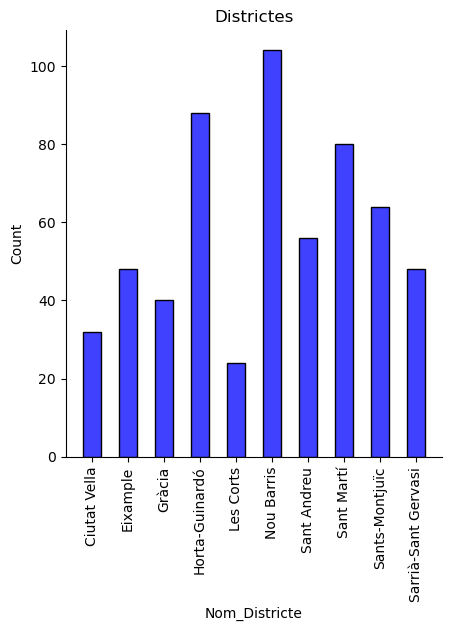

In [28]:
Distritos = sns.displot(df, x='Nom_Districte', shrink=0.5, color='blue')
plt.title('Districtes')
plt.xticks(fontsize=10)
Distritos.set_xticklabels(rotation = 90);

## 2. Crea una visualització amb una variable numèrica (Preu)

**Observaciones**: En esta gráfica podemos comprobar que el grueso del precio de alquiler se encuentra en la franja de los 750 € - 800 €. Hemos aplicado el fitlro previo para solo visualizar los datos de lloguer mitja mensual.

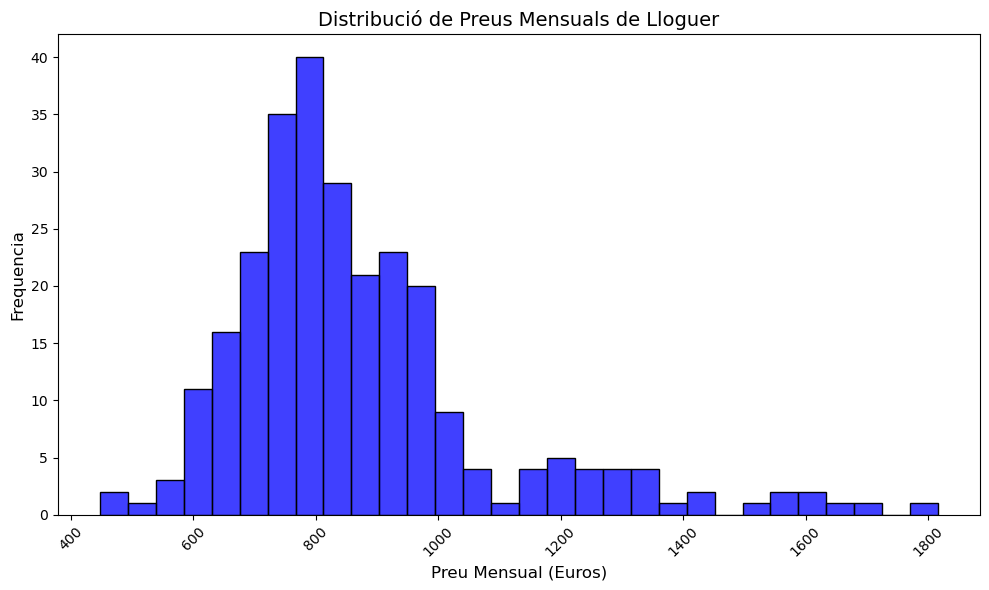

In [29]:
# Filtrar los datos para obtener solo los registros de 'Lloguer mitjà mensual'
lloguer_mitja_mensual = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

# Crear un histograma de los precios mensuales
plt.figure(figsize=(10, 6))  # Tamaño de la figura
precio_mensual = sns.histplot(lloguer_mitja_mensual['Preu'], bins=30, color='blue')

precio_mensual.set_xlabel('Preu Mensual (Euros)', fontsize=12)  # Etiqueta del eje x
precio_mensual.set_ylabel('Frequencia', fontsize=12)  # Etiqueta del eje y
precio_mensual.set_title('Distribució de Preus Mensuals de Lloguer', fontsize=14)  # Título de la gráfica

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar diseño

plt.show()


**Observaciones** Para verlo más en detalle, vamos a desglosarlo en dos gráficas de dispersión, así podremos visualizar ambos datosel precio por metro cuadrado y la media de las mensualidades de los alquileres.

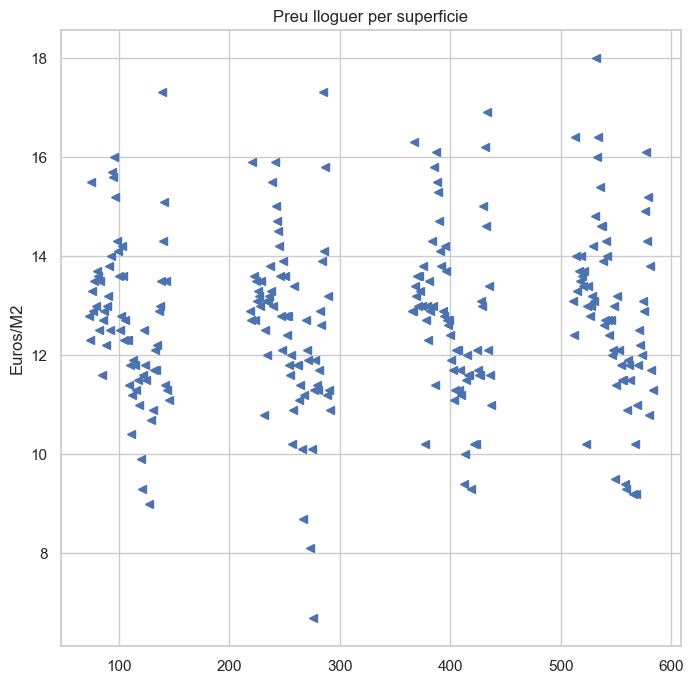

In [139]:
plt.figure(figsize=(8,8))
Precio_por_metros = plt.plot(Lloguer_metres['Preu'], '<')
plt.title('Preu lloguer per superficie')
plt.ylabel('Euros/M2')
plt.savefig('Preu_per_m2.png', bbox_inches='tight')

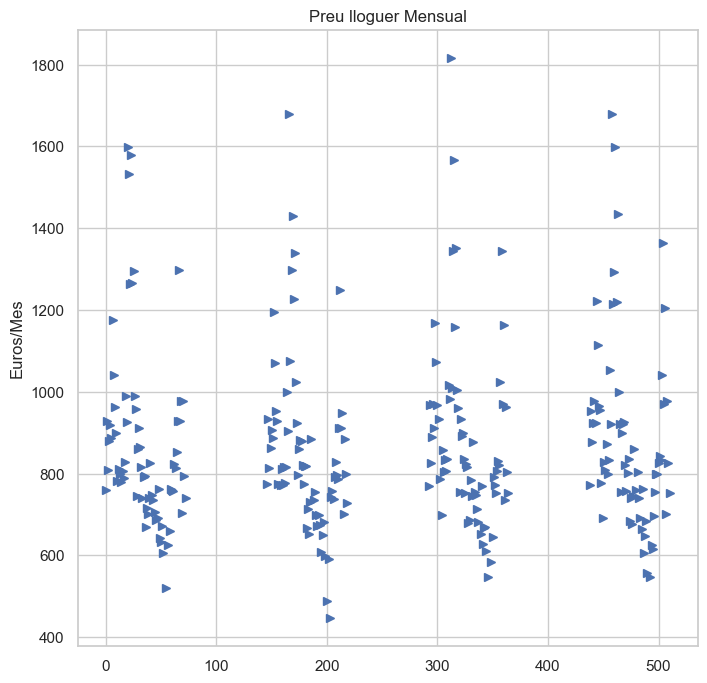

In [140]:
plt.figure(figsize=(8,8))
Precio_mensualidad = plt.plot(Lloguer_mensu['Preu'], '>')
plt.title('Preu lloguer Mensual')
plt.ylabel('Euros/Mes')
plt.savefig('Preu_mensualitat.png', bbox_inches='tight')

## 3-Una variable numérica y una categórica (Districte i Preu)

En la siguiente gráfica podemos observar que el distrito Les Corts es el que alcalza el mayor precio y mayor volumen.

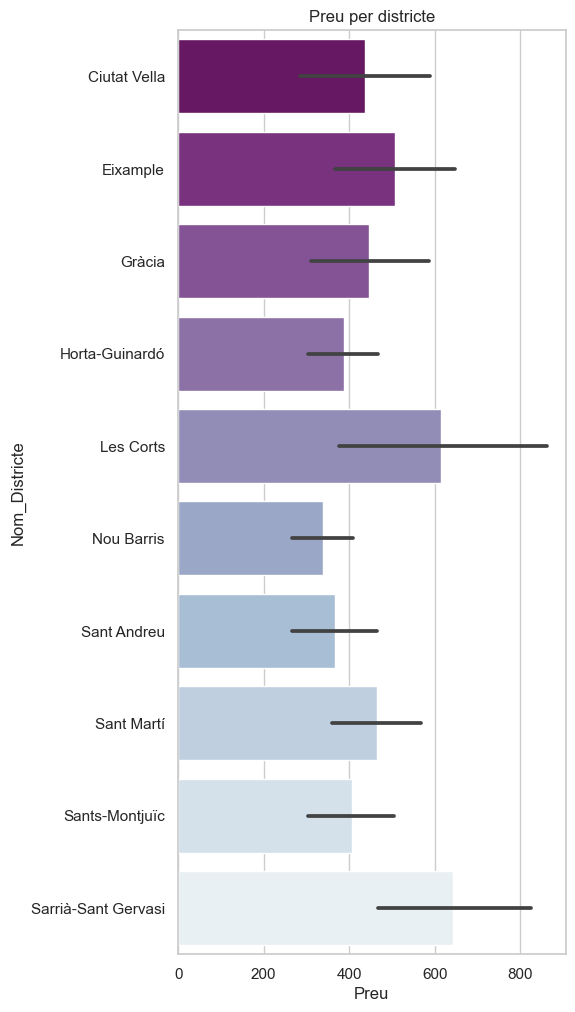

In [141]:
plt.figure(figsize=(5,12))
Precio_por_distrito = sns.barplot(x='Preu', y='Nom_Districte', data=df, orient='h', palette= 'BuPu_r')
plt.title('Preu per districte')
plt.show()

## 4. Crea una visualització amb dues variables numèriques (Any o Trimestre i Preu)

Vamos a utilizar el gráfico Boxplot, donde nos muestra la distrubición del precio a lo largo de cada trimestre, aquí podemos observar que en el tercer trimestre del año se alcanza el precio más alto y aumenta la media de precio, coincidiendo con el época estival del año, donde se concentra el mayor turismo en la ciudad

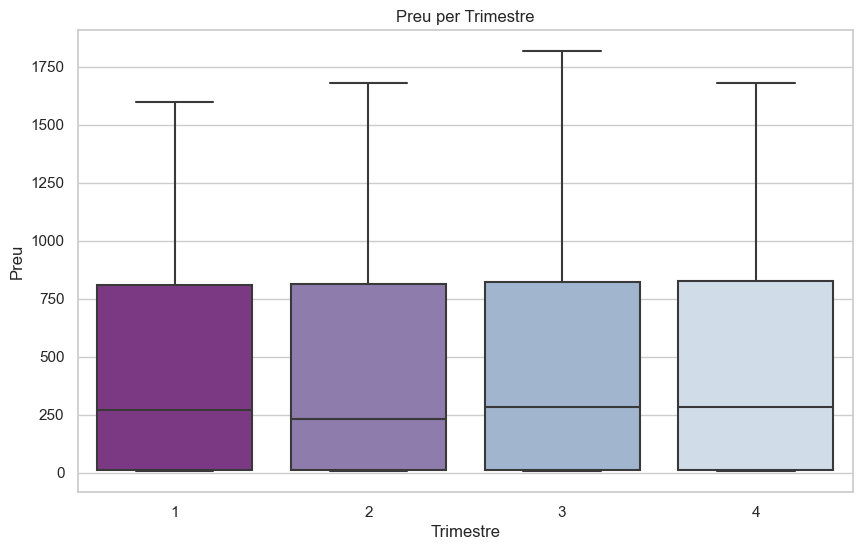

<Figure size 640x480 with 0 Axes>

In [148]:
plt.figure(figsize=(10,6))
Precio_por_trimestre = sns.boxplot(x='Trimestre', y='Preu', data=df, orient='v', palette= 'BuPu_r')
plt.title('Preu per Trimestre')
plt.show()

plt.savefig('Preu_per_trimestre.png', bbox_inches='tight')

## 5. Crea una visualització amb tres variables (Barri o Districte, Trimestre i Preu)

Vamos a realizar una primera gráfica BoxPlot, en el que observamos que la media de precio mensual por distrito, y su evolució de cada trimestre. Observamos que todos los barrios tienen una tendencia a la alza, es decir a mida que va avanzando el trimestre va aumentando el precio, excepto Sarrià - Sant Gervasi, que el primer trimestre empezó fuerte, pero el segundo bajó en picado, y luego fué subiendo gradualmente.

In [34]:
# Filtrar los datos para obtener solo los registros de 'Lloguer mitjà mensual'
lloguer_mitja_mensual = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

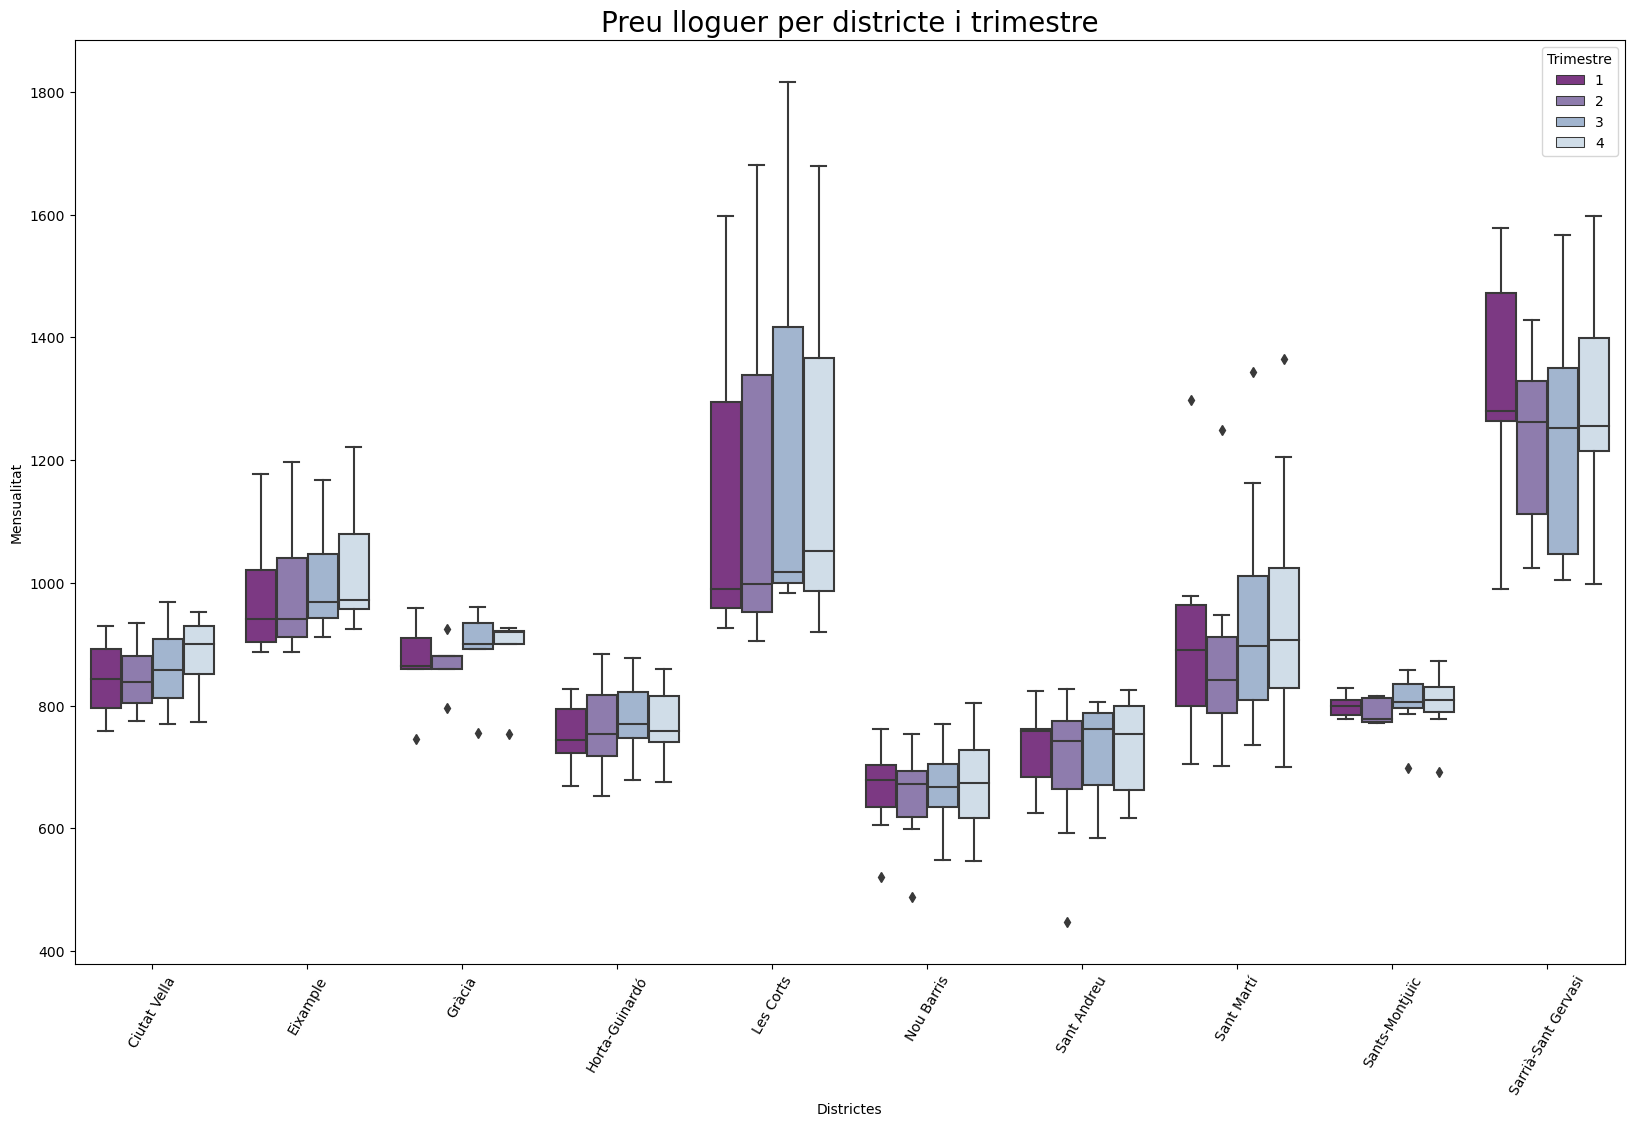

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(20,12))
tres_variables=sns.boxplot(data=lloguer_mitja_mensual, x='Nom_Districte', y='Preu', hue='Trimestre', palette='BuPu_r')
tres_variables.set_title('Preu lloguer per districte i trimestre', fontsize=20)
plt.xlabel('Districtes')
plt.ylabel('Mensualitat')
plt.xticks(rotation = 60)
plt.show()

plt.savefig('tres_variables_distritos.png', bbox_inches='tight')

Realizamos una segunda visualización con los mismos datos el precio medio de la mensualidad por trimestre, pero esta vez veremos el detalle de los barrios, donde podemos observar que hay barrios con datos nulos ( Torre Baró, Vallbona, la Clota, la marina del Prat Vermell). Y el barrio con mayor precio es Pedralbes en el 4º Trimestre.

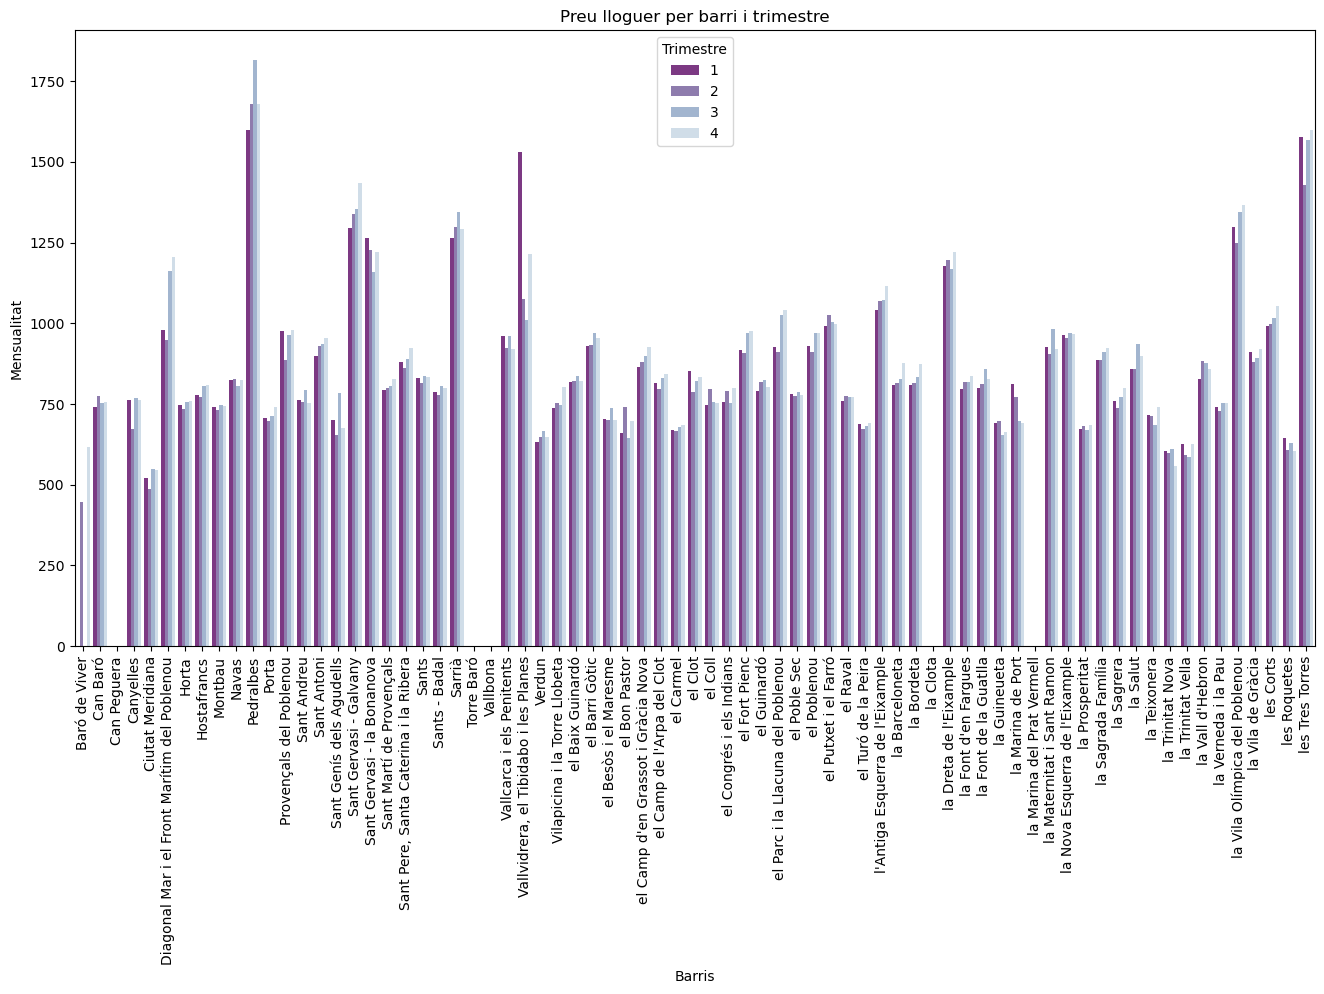

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(16,8))
tres_variables_barrios=sns.barplot(data=Lloguer_mensu, x='Nom_Barri', y='Preu', hue='Trimestre', palette='BuPu_r')
tres_variables_barrios.set_title('Preu lloguer per barri i trimestre', fontsize=12)
plt.xlabel('Barris')
plt.ylabel('Mensualitat')
plt.xticks(rotation = 90)
plt.show()
plt.savefig('tres_variables_barrios.png', bbox_inches='tight')

# Exercici 2

Exporta els gràfics com imatges o com HTML.

# Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.


Análisis de tendencias temporales en los precios de alquiler:

En el siguiente gráfico de lineas podrán ver la variación de los precios de alquiler entre distritos a lo largo del tiempo (trimestres).  

**Observaciones**  
Todos los distritos acaban el trimestre a un precio superior al que comienzan, en cambio Sarrià - Sant Gervasi disminuye.

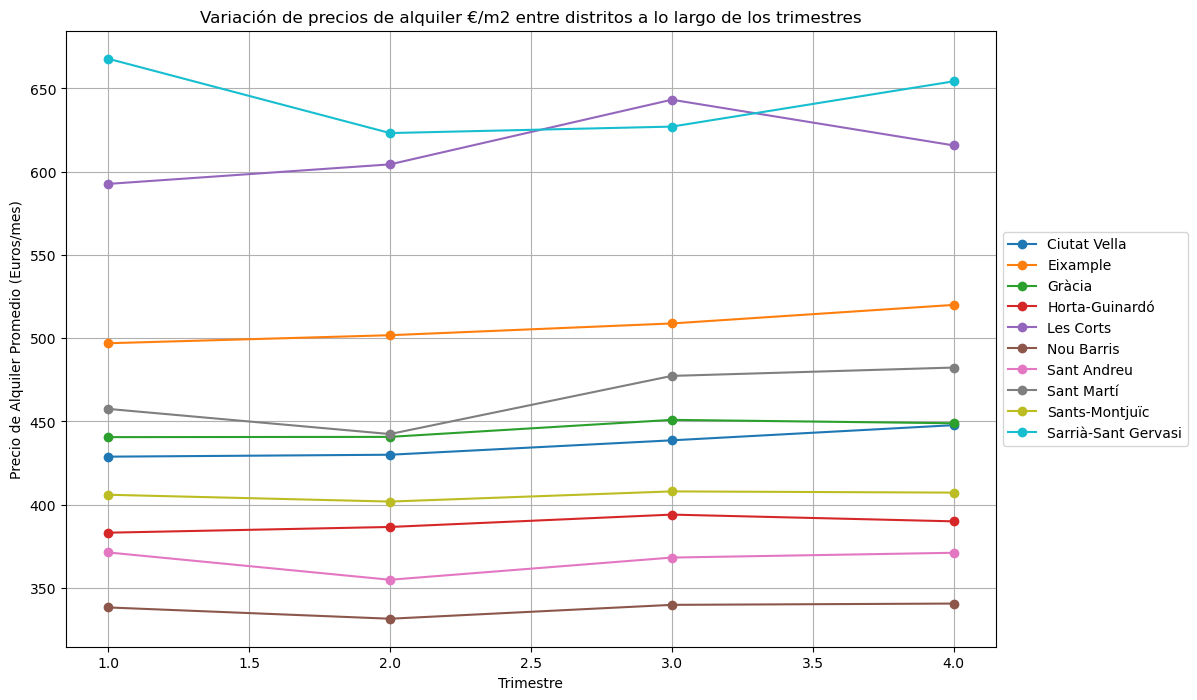

In [37]:
# Agrupar los datos por distrito y trimestre, calculando el precio promedio
datos_por_distrito_trimestre = df.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().unstack()

# Crear el gráfico de líneas para mostrar la variación de precios por distrito a lo largo de los trimestres
plt.figure(figsize=(12, 8))

# Iterar sobre los distritos y trazar las líneas correspondientes
for distrito in datos_por_distrito_trimestre.index:
    plt.plot(datos_por_distrito_trimestre.columns, datos_por_distrito_trimestre.loc[distrito], marker='o', label=distrito)

plt.title('Variación de precios de alquiler €/m2 entre distritos a lo largo de los trimestres')
plt.xlabel('Trimestre')
plt.ylabel('Precio de Alquiler Promedio (Euros/mes)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # loc Posiciona la leyenda a la derecha fuera del gráfico
plt.grid(True)
plt.show()

